**1/ download dataset**

[yahoo finance](https://finance.yahoo.com/quote/MSFT/history/)

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./MSFT.csv')
print(df.shape)
df.head()

(9137, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064383,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400


**2/ preprocessing data - visualization - EDA**

In [3]:
df1 = df.copy()
df1 = df1[['Date','Close']]
df1['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9132    2022-06-06
9133    2022-06-07
9134    2022-06-08
9135    2022-06-09
9136    2022-06-10
Name: Date, Length: 9137, dtype: object

In [4]:
df1['Date'][0].split('-')

['1986', '03', '13']

In [5]:
def str_to_datetime(s):
    '''
    Convert string to datetime format
    '''
    split = s.split('-')
    year,month,day = int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year= year,month=month, day=day)

# test your function
datetime_object = str_to_datetime(df1['Date'][0])
datetime_object

datetime.datetime(1986, 3, 13, 0, 0)

In [6]:
# apply the function to 'Date' column
df1['Date'] = df1['Date'].apply(str_to_datetime)
df1['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9132   2022-06-06
9133   2022-06-07
9134   2022-06-08
9135   2022-06-09
9136   2022-06-10
Name: Date, Length: 9137, dtype: datetime64[ns]

In [7]:
# set the index is Date column
df1.index = df1.pop('Date')
df1.head()

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090


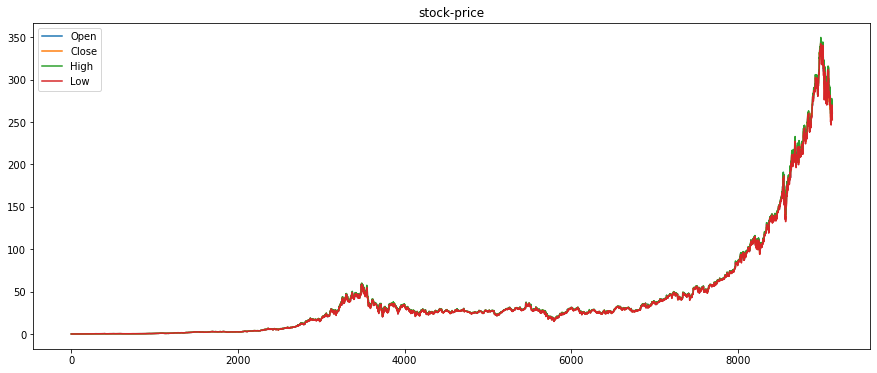

In [8]:
# plot
plt.figure(figsize = (15,6))
plt.plot(df.index,df['Open'],label = 'Open')
plt.plot(df.index,df['Close'],label = 'Close')
plt.plot(df.index,df['High'],label = 'High')
plt.plot(df.index,df['Low'],label = 'Low')
plt.legend()
plt.title('stock-price')
plt.savefig('./imgs/MSFT-stock-price.png')
plt.show()

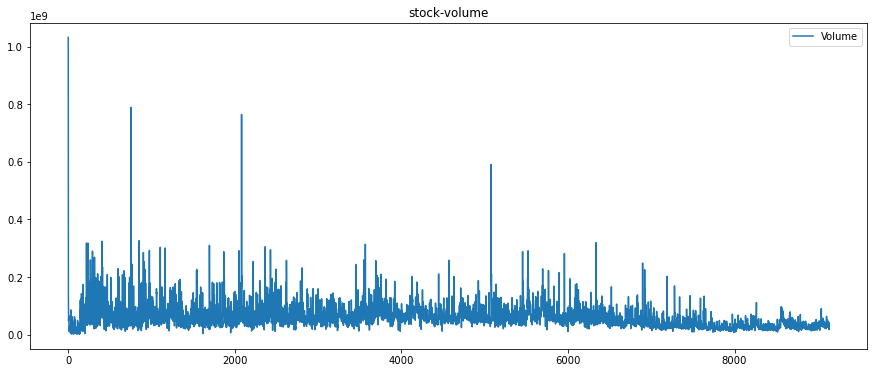

In [9]:
plt.figure(figsize = (15,6))
plt.plot(df.index,df['Volume'],label = 'Volume')
plt.legend()
plt.title('stock-volume')
plt.savefig('./imgs/MSFT-stock-volume.png')
plt.show()

We will forcus on 'Close' price

In [10]:
df1['Close'].describe()

count    9137.000000
mean       42.741320
std        62.281374
min         0.090278
25%         4.414063
50%        26.879999
75%        40.468750
max       343.109985
Name: Close, dtype: float64

In [11]:
df_subset = df1.loc[:str_to_datetime('2013-2-01')].tail(3+1)
df_subset

,Close
Date,
2013-01-29,28.010000
2013-01-30,27.850000
2013-01-31,27.450001
2013-02-01,27.930000


In [12]:
values = df_subset['Close'].to_numpy()
x,y = values[:-1],values[-1]
print(x)
print(y)

[28.01     27.85     27.450001]
27.93


In [13]:
next_week = df1.loc[str_to_datetime('2013-2-01'):str_to_datetime('2013-2-01')+datetime.timedelta(days = 7)]
next_week

,Close
Date,
2013-02-01,27.930000
2013-02-04,27.440001
2013-02-05,27.500000
2013-02-06,27.340000
2013-02-07,27.280001
2013-02-08,27.549999


In [14]:
next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
print(next_datetime_str)

2013-02-04T00:00:00.000000000


In [15]:
next_date_str = next_datetime_str.split('T')[0]
next_date_str

'2013-02-04'

In [16]:
year_month_day = next_date_str.split('-')
year_month_day

['2013', '02', '04']

In [17]:
df_subset = df1.loc[:str_to_datetime('2021-03-25')].tail(3+1) # go back from target-date n samples
df_subset

,Close
Date,
2021-03-22,235.990005
2021-03-23,237.580002
2021-03-24,235.460007
2021-03-25,232.339996


In [18]:
def df_to_windowed_df(dataframe,first_date_str,last_date_str,n =3):
    '''
    create a sub-dataframe from a start-time back to n previous samples
    '''
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)
    
    target_date = first_date
    dates = []
    X,Y = [],[]
    
    last_time = False
    
    while True:
        
        print(f'target_date: {target_date} last_date: {last_date}')
        
        df_subset = dataframe.loc[:target_date].tail(n+1) # go back from target-date n samples
        
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return 
        
        values = df_subset['Close'].to_numpy()
        x,y = values[:-1],values[-1]
        
        dates.append(target_date)
        X.append(x)
        Y.append(Y)
        
        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days = 7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year,month,day = year_month_day
        next_date = datetime.datetime(year = int(year),month =int(month),day = int(day))
        print(f'next_date: {next_date}')
        
        if last_time:
            break
        
        target_date = next_date
        
        if target_date == last_date:
            last_time = True
            
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0,n):
        X[:,i]
        ret_df[f'Target-{n-i}'] = X[:,i]
    ret_df['Target'] = Y

    return ret_df

In [ ]:
# Start day second time around: '2021-03-25'

windowed_df = df_to_windowed_df(df1, '2022-02-25', '2022-03-23', n=3)
windowed_df

**4/ build model**

**5/ train model**

**6/ evaluate model**

**7/ save and load model**

**8/ predict new-input**